# Bayesian Inference
* Notebook completed by Adam Lang
* Date: 4/15/2024 This notebook will go over Bayesian Inference.
* This was completed as part of the Springboard Data Science Fellowship and LinkedIn Learning course "Python Statistics Essential Training."

In [7]:
# install pymc v4
!pip install pymc==4.1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.1/543.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.9 MB/s eta 0:00:00
  Attempting uninstall: pymc
    Found existing installation: pymc 5.10.4
    Uninstalling pymc-5.10.4:
      Successfully uninstalled pymc-5.10.4


In [8]:
## imports
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
# import pmyc
import pymc as pm

# Bayesian Inference
* We do not make estimates of population parameters from the data.
* Rather, we maintain **probability distributions** for population distributions, which represent our quantitative belief about their values.

## How do we do this?
* We start with the probability **priors** and we use **observations** to update them to probability **posteriors**.


# Bayesian Example
* Coin flip 100 times

In [10]:
# flips of the coin
n = 100
k = 61 #heads


with pm.Model() as coin_context:
  p = pm.Uniform('p',0.40, 0.80) #uniformly distributed between 40 and 80%

  # actual observations
  y = pm.Binomial('y',n=n,p=p,observed=k)

  # sample posterior
  trace = pm.sample(10000)


In [16]:
## summarize the posterior probabilities
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.519,0.7,0.001,0.0,7806.0,12931.0,1.0


Summary:
* Mean is 60% - most probable value for the biasness
* std is 0.05%

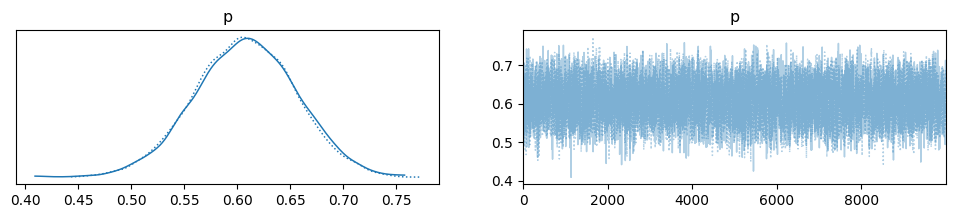

In [14]:
# traceplot
pm.plot_trace(trace);

Summary:
* right plot is all values taken on by parameter P

# Bayesian Modeling with Gap Minder Data

In [18]:
# import data and filter to year == 1985
gdata = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/gapminder.csv').query('year == 1985')

In [19]:
# sort data by age by surviving value
gdata.sort_values('age5_surviving', inplace=True)

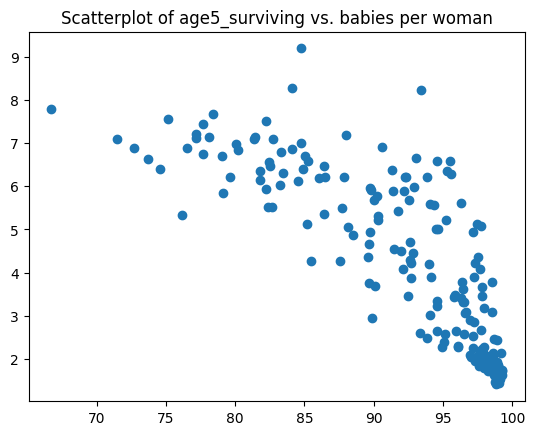

In [21]:
# scatter plot
plt.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])
plt.title('Scatterplot of age5_surviving vs. babies per woman');

### Simple Bayesian Model

In [25]:
with pm.Model() as gapminder_context:
    # Priors for unknown model parameters
    intercept = pm.Uniform('intercept', lower=5, upper=15)
    slope = pm.Uniform('slope', lower=-1, upper=1)

    # Expected value of babies per woman
    mu = intercept + slope * (gdata['age5_surviving'] - 65)

    # Likelihood (sampling distribution) of observations
    babies = pm.Normal('babies', mu=mu, sigma=1, observed=gdata['babies_per_woman'])

    # Perform MCMC sampling
    trace = pm.sample(10000)

In [26]:
## summary
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,10.200,0.28,9.679,10.73,0.004,0.003,3957.0,4291.0,1.0
slope,-0.219,0.01,-0.238,-0.20,0.000,0.000,3883.0,4311.0,1.0


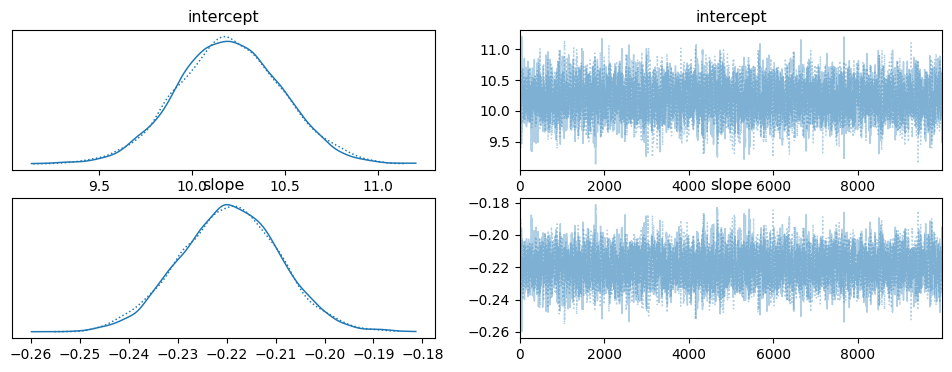

In [29]:
## traceplot
pm.plot_trace(trace);

In [ ]:
# mean of posterior and multiply by explanatory var
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

In [ ]:
plt.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
plt.plot(gdata['age5_surviving'], babies,'C1');